# PyAnimationContestGif: An Example of data visualization in an animation format


#### About the Project:


PyAnimationContestGif is a sample of how you can use animation feature of matplotlib to create a great data visualization that shows you the changes during time. 

**Here is the story of this example:**

Three games launched at different time: Game1 launched at 2021-01-06, Game2 launched at 2021-01-29 and Game3  launched at 2021-02-22. 
I want to investigate the process of gamers starting playing each game. How fast each game obtained its gamers and how common are gamers between games. 
I used two plots to visualize the results:
* Bar plot to show number of gamers for each game during the time
* Venn plot to show logical relationships between  collection of gamers sets

## Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation ,PillowWriter
from matplotlib_venn import venn3_circles
from matplotlib_venn import venn3



sns.set()
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_csv("PyAnimationContest_SmallSampleData.csv")
df = df[["userID" , "gameID","date"]]
df["date"] = pd.to_datetime(df["date"]).dt.date
df.head()

,userID,gameID,date
0,13269907,82039,2021-01-06
1,76793207,93191,2021-02-23
2,100901393,82039,2021-01-08
3,102725615,93191,2021-02-23
4,19230901,83003,2021-01-29


## Check Some Stats

In [3]:
# game names and their ids
gameID_Name = {82039:"Game1" , 83003:"Game2", 93191:"Game3"}
df["game_name"] = df["gameID"].replace(gameID_Name)

In [4]:
# Games lauch time
df_launch = df.groupby(["game_name"])["date"].min().reset_index()
print("Game Launch Date: \n\n",df_launch)
print("\n\n##############################")

# Number of users
print("\n\n Number of gamers: {}".format(df["userID"].nunique()))
print("\n\n##############################")


# Number of users
df_users = df.groupby(["game_name"])["userID"].nunique().reset_index()
print("\n\n Total Number of gamers for each game: \n\n", df_users )
print("\n\n##############################")


# Time duration
start_date = df["date"].min()
stop_date = df["date"].max()
time_duration = (stop_date - start_date).days
print("\n\n The launching time started at {} and we investigated the gamers behavior in {} days\n".format(start_date, time_duration))


Game Launch Date: 

   game_name        date
0     Game1  2021-01-06
1     Game2  2021-01-29
2     Game3  2021-02-22


##############################


 Number of gamers: 255068


##############################


 Total Number of gamers for each game: 

   game_name  userID
0     Game1  112193
1     Game2  107909
2     Game3   73863


##############################


 The launching time started at 2021-01-06 and we investigated the gamers behavior in 57 days



In [5]:
# Want to know the state of gamers in each day so we sort date values to go day by day 
date_list = sorted(df["date"].unique())

In [6]:
# For each day, total gamers of each game is considered
# The common gamers count is calculated 
# And the share of total user for each batch
# Data gathered into a data list
# And will used in the animate function

data_list =[]
for dt in date_list:
    df1 = df[(df.gameID == 82039)&(df["date"]<=dt)].copy()
    df2 = df[(df.gameID == 83003)&(df["date"]<=dt)].copy()
    df3 = df[(df.gameID == 93191)&(df["date"]<=dt)].copy()
    
    x1 = df1.userID.nunique()
    x2 = df2.userID.nunique()
    x3 = df3.userID.nunique()
    
    x11 = len(set(df1.userID) - set(df2.userID) - set(df3.userID))
    x22 = len(set(df2.userID) - set(df1.userID) - set(df3.userID))
    x33 = len(set(df3.userID) - set(df2.userID) - set(df1.userID))
    
    x12 = len(set(df1.userID).intersection(set(df2.userID)) - set(df3.userID))
    x13 = len(set(df1.userID).intersection(set(df3.userID)) - set(df2.userID))
    x23 = len(set(df2.userID).intersection(set(df3.userID)) - set(df1.userID))
    
    x123 = len(set(set(df2.userID).intersection(set(df3.userID))).intersection(set(df1.userID)))
    
    x_date = df[(df["date"]<=dt)].userID.nunique()
    x11_ratio = x11/x_date
    x22_ratio = x22/x_date
    x33_ratio = x33/x_date
    x12_ratio = x12/x_date
    x13_ratio = x13/x_date
    x23_ratio = x23/x_date
    x123_ratio = x123/x_date   
    
    data_list.append([x1,x2,x3,str(dt),x11,x22,x12,x33,x13,x23,x123,
                     x11_ratio,x22_ratio,x12_ratio,x33_ratio,x13_ratio,x23_ratio,x123_ratio , x_date])

<IPython.core.display.Javascript object>


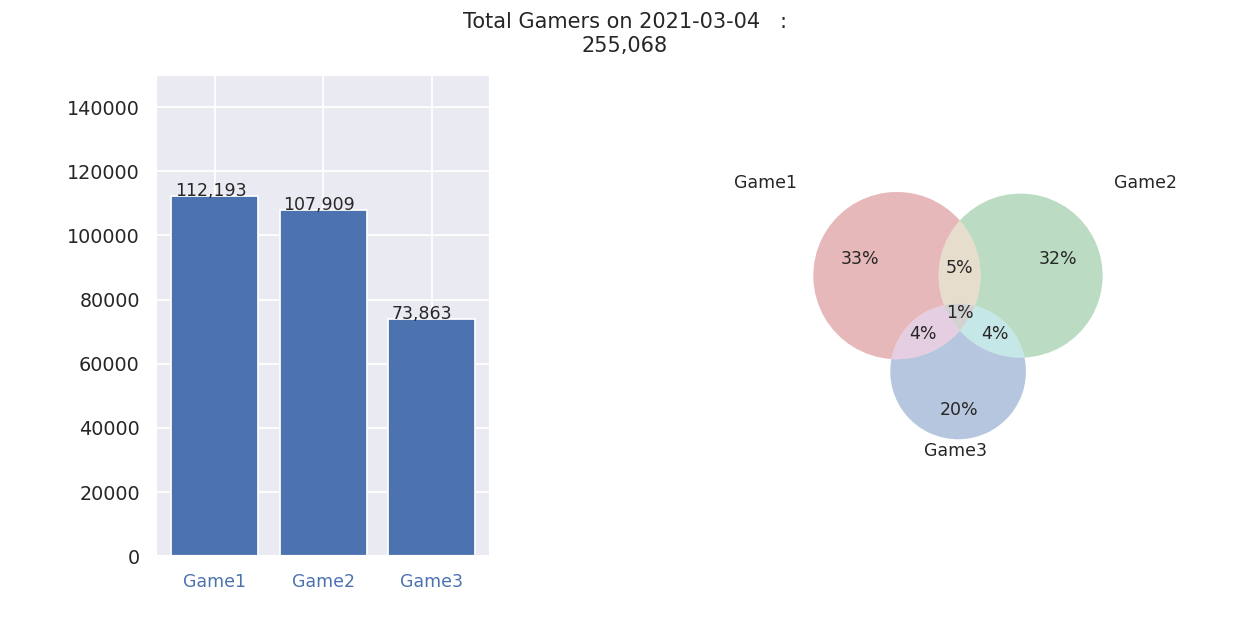

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
plt.subplots_adjust(wspace=0.9)

        
def animate(i):
    data = i
    ax1.clear()
    ax2.clear()
    [x1,x2,x3] = data[:3]
    [x11,x22,x12,x33,x13,x23,x123] = data[4:11]
    [x11_ratio,x22_ratio,x12_ratio,x33_ratio,x13_ratio,x23_ratio,x123_ratio] = data[11:18]
    ax1.bar([0,1,2] , [x1,x2,x3], )
    ax1.set_xticks([0,1,2])
    ax1.set_xticklabels(["Game1","Game2","Game3"]  ,c='b' ,fontsize=10)
    ax1.text(0-0.37,x1,f"{x1:,}")
    if(x2>0):
        ax1.text(1-0.37,x2,f"{x2:,}")
    if x3>0:
        ax1.text(2-0.37,x3,f"{x3:,}")
    ax1.set_ylim([0,150000])
    
    
    v = venn3(subsets = (x11,x22,x12,x33,x13,x23,x123), set_labels = ('', '', '') , ax=ax2)
    ax2.text(-1,0.5,"Game1")
    if x22>0:
        ax2.text(0.7,0.5,"Game2")
    if x33>0:
        ax2.text(-0.15,-0.7,"Game3")

    
    if(x11>0):
        v.get_label_by_id('100').set_text("{}%".format(round(x11_ratio*100)))
    if(x22>0):
        v.get_label_by_id('010').set_text("{}%".format(round(x22_ratio*100)))
    
    if(x12>0):
        v.get_label_by_id('110').set_text("{}%".format(round(x12_ratio*100)))
    if(x33>0):
        v.get_label_by_id('001').set_text("{}%".format(round(x33_ratio*100)))
        
    if(x13>0):
        v.get_label_by_id('101').set_text("{}%".format(round(x13_ratio*100)))
    if(x23>0):
        v.get_label_by_id('011').set_text("{}%".format(round(x23_ratio*100)))
    if(x123>0):
        v.get_label_by_id('111').set_text("{}%".format(round(x123_ratio*100)))
    

    fig.suptitle('Total Gamers on {}   :\n'.format(data[3])+f"{data[18]:,}")
    

    
    

anim= FuncAnimation(fig,animate,data_list,interval=600,repeat=False)

# Here you can save your amazing gif
# For speed up the plot change the fps value
# If you don't need to save the gif file just comment out the line bellow, it will save you some time.
anim.save('PyAnimationContest_Gif.gif', writer='imagemagick', fps=3)
